In [1]:
import numpy as np
import re
import random

import tensorflow as tf
import sklearn as sk

import Functions as fn
from DS import DS
from Set import pool
from Iterator import Iterator
from FFModel import FF_Model

In [2]:
#Dataset = fn.first_time_load()
#Dataset.write_texts()
#Dataset.write_labels()

Dataset = pool()
Dataset.load_texts()
Dataset.load_labels()

Texts loaded
Labels loaded


In [3]:
#print('Number of Texts: ', Dataset.size)
#print('Number of 2007 Smoking Challenge texts: ', Dataset.number_of(challenge='2007 Smoking Challenge'))
#print('Number of 2008 ObesityChallenge texts: ', Dataset.number_of(challenge='2008 Obesity Challenge'))
#print('Number of 2009 Medication Challenge texts: ', Dataset.number_of(challenge='2009 Medication Challenge'))
#print('Number of 2010 Relations Challenge texts: ', Dataset.number_of(challenge='2010 Relations Challenge'))
#print('Number of 2011 Coreference Challenge texts: ', Dataset.number_of(challenge='2011 Coreference Challenge'))
#print('Number of 2012 Temporal Relations Challenge texts: ', Dataset.number_of(challenge='2012 Temporal Relations Challenge'))
#print('Number of Train Texts: ', Dataset.number_of(stage='train'))
#print('Number of Test Texts: ', Dataset.number_of(stage='test'))
#print('Number of Labeled Texts: ', Dataset.number_of(labelled='yes'))
#print('Number of Initially Labeled Texts: ', Dataset.number_of(labelled='yes', label_type='train'))
#print('Number of Competitor Labeled Texts Texts: ', Dataset.number_of(labelled='yes', label_type='test'))

In [4]:
#Dataset.process_for_embedding()
#sentences = Dataset.get_sentences()

In [5]:
from gensim.models import Word2Vec
#model = Word2Vec(sentences, min_count=1, size=100)
model = Word2Vec.load('W2V')

#fn.write_emb('testemb', model)
#model = fn.load_emb('testemb')
#model.save('W2V')

C:\Users\Luka\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
#model.most_similar("prozac", topn=10)

In [7]:
targets = ['medications', 'dosages', 'modes', 'frequencies', 'durations', 'reasons']
target_dict = {label: words for (label, words) in zip(targets, list(fn.label_words(Dataset, model)))}

Number of: m=928, do=119, mo=76, f=79, du=80, r=482


In [8]:
#fn.visualise(model, sentences, [target_dict['medications']], 1000, 'Medications in top 1000 words')

In [9]:
#print_set = set()
#for case in Dataset.get_DS(labelled='yes').data:
#    for term in re.finditer(r'm="[a-z0-9 ]+"', case.raw_labels):
#        if term.group()[3:-1] != 'nm': print_set.add(term.group()[3:-1])
#print(*print_set, sep='\n')

In [10]:
#for target in targets:
#    for reps in [True, False]:
#        target_size = len(target_dict[target])
#        sets = fn.get_traintest(model, target_dict[target], target_size * 5, target_size, 10, 50, reps, reps)
#        sets = {'train_set': sets[0], 'train_labels': sets[1], 'validation_set': sets[2], 'validation_labels': sets[3], 'test_set': sets[2], 'test_labels': sets[3]}
#        print("Target: %s \tRepetitions: %s" % (target, reps))
#        NN = FF_Model()
#        NN.build_graph()
#        NN.train(sets, report_percentage=10)

In [11]:
labelled_cases = Dataset.get_DS(labelled='yes')
labelled_cases.process_for_testing()

In [12]:
sets = fn.get_traintest2(labelled_cases, model)

237160	237160	26954	26954	28514	28514	28514


In [13]:
print(np.array(sets['train_labels']).sum(0)/ len(sets['train_labels']))

[ 0.02979845  0.97020155]


In [14]:
fn.saturate_training_set(sets, model, target_dict['medications'], 0.1)

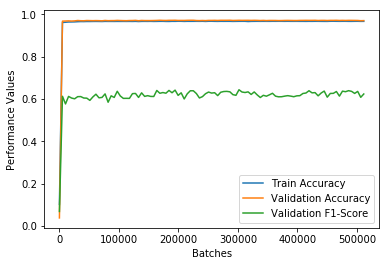

Test F1-Score: 0.603732



In [26]:
NN = FF_Model(layers=[30])
NN.build_graph()
NN.train(sets, epochs=100)

In [27]:
res = NN.predict(sets['test_set'])
tru = np.argmax(sets['test_labels'], 1)

In [28]:
tp = len([a for a in range(len(tru)) if (res[a] == 0) and (tru[a] == 0)])
tn = len([a for a in range(len(tru)) if (res[a] == 1) and (tru[a] == 1)])
fp = len([a for a in range(len(tru)) if (res[a] == 0) and (tru[a] == 1)])
fn = len([a for a in range(len(tru)) if (res[a] == 1) and (tru[a] == 0)])
tp, tn, fp, fn

(550, 27242, 533, 189)

In [29]:
sk.metrics.f1_score(tru, res, pos_label=0, average='binary')

0.60373216245883643

In [30]:
[(sets['test_words'][a], res[a], tru[a]) for a in range(len(sets['test_words'])) if res[a] == 1 and tru[a] == 0]

[('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('<num>/<num>', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('penicillin', 1, 0),
 ('penicillin', 1, 0),
 ('r-chop', 1, 0),
 ('normal', 1, 0),
 ('saline', 1, 0),
 ('medications', 1, 0),
 ('oxygen', 1, 0),
 ('oxygen', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('susp.', 1, 0),
 ('mg', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 ('amoxicil...', 1, 0),
 (')', 1, 0),
 ('previous', 1, 0),
 ('home', 1, 0),
 ('medications', 1, 0),
 ('(', 1, 0),
 ('pain', 1, 0),
 (')', 1, 0),
 ('medications', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('blood', 1, 0),
 ('blood', 1, 0),
 ('blood', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 (')', 1, 0),
 ('(', 1, 0),
 ('(', 1, 0),
 ('rel.', 1, 0),
 (')', 1, 0),
 (')',

In [31]:
proba = []
for i in range(len(res)):
    if not (sets['test_words'][i] == ')' or sets['test_words'][i] == '('):
        proba.append([sets['test_words'][i], res[i], tru[i]])

In [32]:
sk.metrics.f1_score(np.array(proba)[:,2].astype(int), np.array(proba)[:,1].astype(int), pos_label=0, average='binary')

0.64440538957234916